In [1]:
#Importing Libraries
[1]
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset ['train'].to_pandas()
#Data Cleanup
df ['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

d:\Program Files\anaconda\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Axes: xlabel='job_title_short'>

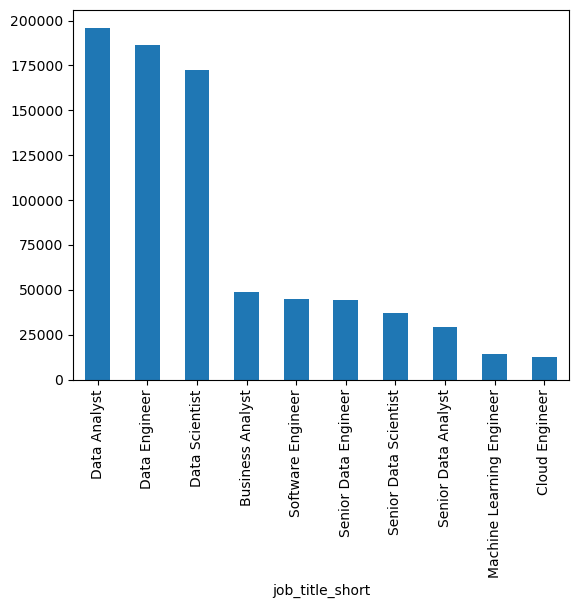

In [2]:
fig, ax = plt.subplots()
df['job_title_short'].value_counts().plot(kind = 'bar')

In [3]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

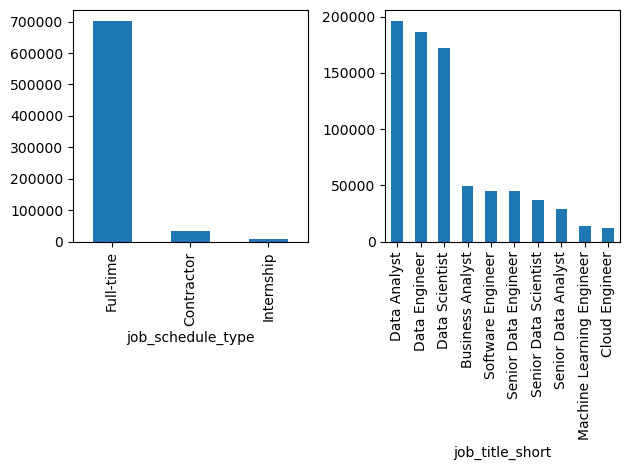

In [4]:
fig, ax = plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])
fig.tight_layout()

In [5]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = skills_count.reset_index(name = 'skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace = True)
df_skills_count

,job_skills,job_title_short,skill_count
16110,['excel'],Data Analyst,8095
208186,['sql'],Data Analyst,4997
116092,['python'],Data Scientist,4659
146457,"['sql', 'excel']",Data Analyst,3020
16108,['excel'],Business Analyst,2443
...,...,...,...
87588,"['python', 'scala', 'gcp', 'spark', 'git', 'je...",Data Engineer,1
87589,"['python', 'scala', 'gcp', 'spark', 'hadoop']",Data Scientist,1
87590,"['python', 'scala', 'gcp', 'spark', 'linux', '...",Data Scientist,1
87591,"['python', 'scala', 'gcp', 'spark', 'linux', '...",Data Scientist,1


In [6]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

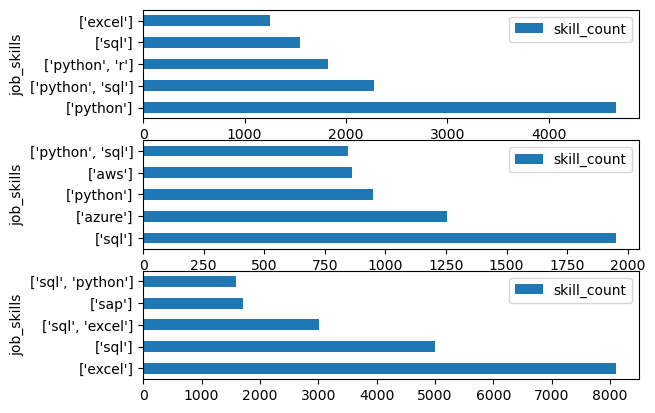

In [8]:
fig, ax = plt.subplots(3,1)
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head()
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i])
   